In [174]:
import pandas as pd
import altair as alt
alt.renderers.set_embed_options(theme='dark')
pd.set_option('display.max_colwidth', None)

# Analysis & Charts

In [175]:
def claim(claim_hash):
    try:
        df_claim = pd.read_json(
            f'https://node-api.flipsidecrypto.com/api/v2/queries/{claim_hash}/data/latest',
            convert_dates=["BLOCK_TIMESTAMP"],
        )
    except Exception as e:
        print(e)
        return 
    return df_claim

In [176]:
class DataProvider:    
    
    def __init__(self):
        self.vote = 'a3efd3f0-724b-4a26-9f92-6083c7c52785'
        self.date_wallet = '074c2ad1-a842-442d-a0f5-6456b35be648'
        self.validators_voting_power = 'fe7c80cd-d061-4c66-8230-68f7776bafbb'
        self.validators = 'db245c79-577e-4aa0-876e-49e57556afaa'
    
    def get_vote(self):
        df = claim(self.vote)
        df.columns = [c.lower() for c in df.columns]
        return df
    
    def get_date_wallet(self):
        df = claim(self.date_wallet)
        df.columns = [c.lower() for c in df.columns]
        return df
    
    def get_validators(self):
        df = claim(self.validators)
        df.columns = [c.lower() for c in df.columns]
        return df
    
    def get_validators_voting_powers(self):
        df = claim(self.validators_voting_power)
        df.columns = [c.lower() for c in df.columns]
        df['day'] = df.day.apply(lambda x: str(x)[:10])
        df = df[df.day=='2022-05-12']
        return df
    
   

In [177]:
dp = DataProvider()

## Handle Validators

In [178]:
valid = dp.get_validators()
valid['address'] = valid.delegator_address
valid[valid.operator_address=='terravaloper1259cmu5zyklsdkmgstxhwqpe0utfe5hhyty0at']

,label,operator_address,delegator_address,vp_address,address
37,Orion.Money,terravaloper1259cmu5zyklsdkmgstxhwqpe0utfe5hhyty0at,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,terravalcons1ty43n6et4c2hc9ccpmrlvk3yj68lpxreekqgyd,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc


In [179]:
valid_vp = dp.get_validators_voting_powers()
valid_vp['date'] = valid_vp['day'].apply(str)
valid_vp['vp_address'] = valid_vp.address
valid_vp.columns

Index(['day', 'address', 'voting_power', 'date', 'vp_address'], dtype='object')

In [180]:
votes = dp.get_vote()
votes['date'] = votes['date'].apply(lambda x: str(x)[:10])
votes.columns

Index(['date', 'address', 'blockchain', 'chain_id', 'tx_status', 'block_id',
       'block_timestamp', 'tx_id', 'msg_type', 'voter', 'voter_label_type',
       'voter_label_subtype', 'voter_address_label', 'voter_address_name',
       'proposal_id', 'option', 'voting_power', 'address_label_type',
       'address_label_subtype', 'address_label', 'address_name', 'balance',
       'balance_usd', 'balance_type', 'is_native', 'currency'],
      dtype='object')

In [181]:
valid_final = valid.merge(votes.drop(columns=['voting_power']),on='address')\
                   .merge(valid_vp.drop(columns=['address','date']), on=['vp_address'])
valid_final['balance'] = valid_final.voting_power
valid_final['date'] = valid_final['date']+' 00:00:00'
valid_final[valid_final.address=='terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc']

,label,operator_address,delegator_address,vp_address,address,date,blockchain,chain_id,tx_status,block_id,...,address_label_subtype,address_label,address_name,balance,balance_usd,balance_type,is_native,currency,day,voting_power
2,Orion.Money,terravaloper1259cmu5zyklsdkmgstxhwqpe0utfe5hhyty0at,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,terravalcons1ty43n6et4c2hc9ccpmrlvk3yj68lpxreekqgyd,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,2022-05-20 00:00:00,terra,columbus-5,SUCCEEDED,7710376,...,validator,Orion.Money,delegator_address,1.680850e+07,0.0,staked,True,LUNA,2022-05-12,1.680850e+07


## ----------------

In [182]:
df = dp.get_vote()
df[df.address=='terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc']

,date,address,blockchain,chain_id,tx_status,block_id,block_timestamp,tx_id,msg_type,voter,...,voting_power,address_label_type,address_label_subtype,address_label,address_name,balance,balance_usd,balance_type,is_native,currency
9266,2022-05-20,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,terra,columbus-5,SUCCEEDED,7710376,2022-05-20 22:59:05.095,4787E4BF3B47BF48F161BF1DFAA9747850D8196903667DC7B2B92F1EDF75BCC7,gov/MsgVote,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,...,NaN,operator,validator,Orion.Money,delegator_address,0.0,0.0,staked,True,LUNA


**Merge validators and normal users**

In [183]:
df = df[~df.address.isin(valid_final.address.values)].append(valid_final[df.columns])

In [184]:
df[df.address=='terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc']

,date,address,blockchain,chain_id,tx_status,block_id,block_timestamp,tx_id,msg_type,voter,...,voting_power,address_label_type,address_label_subtype,address_label,address_name,balance,balance_usd,balance_type,is_native,currency
2,2022-05-20 00:00:00,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,terra,columbus-5,SUCCEEDED,7710376,2022-05-20 22:59:05.095,4787E4BF3B47BF48F161BF1DFAA9747850D8196903667DC7B2B92F1EDF75BCC7,gov/MsgVote,terra1259cmu5zyklsdkmgstxhwqpe0utfe5hhyygjdc,...,1.680850e+07,operator,validator,Orion.Money,delegator_address,1.680850e+07,0.0,staked,True,LUNA


In [185]:
df

,date,address,blockchain,chain_id,tx_status,block_id,block_timestamp,tx_id,msg_type,voter,...,voting_power,address_label_type,address_label_subtype,address_label,address_name,balance,balance_usd,balance_type,is_native,currency
0,2022-05-19 00:00:00,terra1dnaypxevg7cadcev2jqv9stprtrq2yllk88x5v,terra,columbus-5,SUCCEEDED,7696899,2022-05-19 23:27:57.490,27861642CD72433874C3EE1754612B32328CDFE6D6A121B9EA76C8595264EE9E,gov/MsgVote,terra1dnaypxevg7cadcev2jqv9stprtrq2yllk88x5v,...,NaN,None,None,None,None,1.029998e+01,0.001462,staked,True,LUNA
1,2022-05-18 00:00:00,terra184620h8m0z75ts2a3wrhj3rfsct5waww507lvl,terra,columbus-5,SUCCEEDED,7679381,2022-05-18 17:02:13.630,8318DF81A6D78572DC3A8948F700BC9C8B99516302377294EDB84AE36433EFD7,gov/MsgVote,terra184620h8m0z75ts2a3wrhj3rfsct5waww507lvl,...,NaN,None,None,None,None,0.000000e+00,0.000000,staked,True,LUNA
2,2022-05-19 00:00:00,terra1htwtny8r275mpukpjtw3l2r5e88gzkvvqp7zw3,terra,columbus-5,SUCCEEDED,7690733,2022-05-19 12:40:38.729,0459D81E1ACA4160A4BBA1E6310C2549E7A086A2DDF3CBC96076C0B95A8C02C6,gov/MsgVote,terra1htwtny8r275mpukpjtw3l2r5e88gzkvvqp7zw3,...,NaN,None,None,None,None,3.000000e+01,0.004257,staked,True,LUNA
3,2022-05-19 00:00:00,terra1u9a4h2vu5f7hmwyy9yp78g8eu0pmgmvj9sszkt,terra,columbus-5,SUCCEEDED,7692242,2022-05-19 15:18:00.701,D9FB02562837B99083F52DCCCD9982835AF1C2DE160F0B2FE2F16647D55A55B6,gov/MsgVote,terra1u9a4h2vu5f7hmwyy9yp78g8eu0pmgmvj9sszkt,...,NaN,None,None,None,None,0.000000e+00,0.000000,staked,True,LUNA
4,2022-05-18 00:00:00,terra1p84p9lyhkzc8tf900xnq2x4d5ujuylts6q4qy8,terra,columbus-5,SUCCEEDED,7680274,2022-05-18 18:35:05.941,08579A55A1B69B536A507797A9D63EA1B05C94AC04BD74CED13C7E98A1F4B736,gov/MsgVote,terra1p84p9lyhkzc8tf900xnq2x4d5ujuylts6q4qy8,...,NaN,None,None,None,None,0.000000e+00,0.000000,staked,True,LUNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2022-05-19 00:00:00,terra1jyjg55hzsh0f4xymy0kuuan30pp4q75ru0h35c,terra,columbus-5,SUCCEEDED,7687098,2022-05-19 06:22:40.179,26566730DD5BDA142DFA017CACC87C0C0E1C8E4CBCA92C97591CEF6166ADF825,gov/MsgVote,terra1jyjg55hzsh0f4xymy0kuuan30pp4q75ru0h35c,...,1.313944e+06,operator,validator,kytzu,delegator_address,1.313944e+06,0.000000,staked,True,LUNA
15,2022-05-19 00:00:00,terra198c72uxt9p8r2u5y6zha4390qjkayvjr38ppk4,terra,columbus-5,SUCCEEDED,7683861,2022-05-19 00:47:49.951,070FC58026ADECAD61E91EF3F93C152D825593886771CDEA3019228CBF1F65F1,gov/MsgVote,terra198c72uxt9p8r2u5y6zha4390qjkayvjr38ppk4,...,5.938921e+05,operator,validator,Zerg One,delegator_address,5.938921e+05,0.000142,staked,True,LUNA
16,2022-05-18 00:00:00,terra1dcrq2xwuhea9hm5xfuydjuwgz6gm7vdjz34gv6,terra,columbus-5,SUCCEEDED,7676948,2022-05-18 12:47:59.626,7D7CEF1BC58A93A6112402A3FA5956BEDB4ABEBC43731125DF49BBE41D4FB667,gov/MsgVote,terra1dcrq2xwuhea9hm5xfuydjuwgz6gm7vdjz34gv6,...,4.777624e+05,operator,validator,Mr.K,delegator_address,4.777624e+05,0.000179,staked,True,LUNA
17,2022-05-18 00:00:00,terra1qqu376azltyc5wnsje5qgwru5mtj2yqdhj0cwl,terra,columbus-5,SUCCEEDED,7676594,2022-05-18 12:11:14.140,0F2D2EAC3C52C939E1DD41627660D69CCE6B74292AF6A44C0029CCCC36E507F7,gov/MsgVote,terra1qqu376azltyc5wnsje5qgwru5mtj2yqdhj0cwl,...,9.739337e+05,operator,validator,TERRA-FIRMA,delegator_address,9.739337e+05,0.000000,staked,True,LUNA


In [186]:
df.set_index('tx_id').to_json('../data/votes_tx.json')

In [187]:
df.option.unique()

array(['VOTE_OPTION_YES', 'VOTE_OPTION_NO_WITH_VETO', 'VOTE_OPTION_NO',
       'VOTE_OPTION_ABSTAIN'], dtype=object)

In [188]:
df['hours_since_start'] = (df.block_timestamp - df.block_timestamp.min()).apply(lambda x: x.total_seconds() / 3600)

In [189]:
df.option = df.option.map({'VOTE_OPTION_NO_WITH_VETO':'No with veto',
               'VOTE_OPTION_YES':'Yes',
               'VOTE_OPTION_NO':'No',
               'VOTE_OPTION_ABSTAIN':'Abstain'})

In [190]:
df.to_json('../data/votes.json',orient='records')

## Quick and dirty analysis

In [191]:
wc = dp.get_date_wallet()
wc['date'] = wc['min(date)']
wc['age'] = (pd.Timestamp('2022-05-20') - pd.to_datetime(wc.date)).apply(lambda x: x.total_seconds()/3600/24)

In [192]:
def typew(date):
    if(date<'2021-09-30'):
        return 'Pre-Col5'
    if((date>='2021-09-30')&(date<='2022-05-07')):
        return 'Post-Col5'
    if((date>'2021-05-07')):
        return 'Post-DePeg'

wc['typew'] = wc.date.apply(typew)

In [193]:
df.merge(wc[['address','age']], on='address', how='left').to_json('../data/votes.json',orient='records')

In [194]:
m = wc.merge(df, on='address')

<AxesSubplot:title={'center':'Number of Users'}>

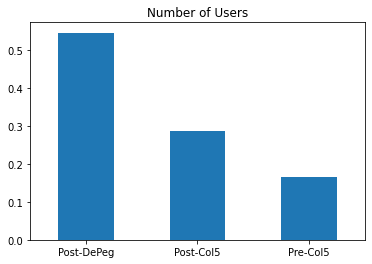

In [195]:
m.typew.value_counts(normalize=True).plot(kind='bar',rot=0, title='Number of Users')

<AxesSubplot:title={'center':'Voting Power'}, xlabel='typew'>

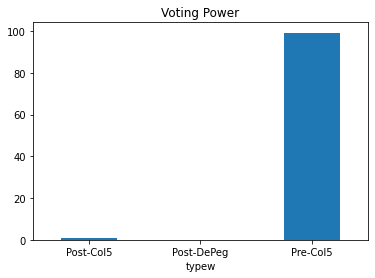

In [196]:
dfm = (m.groupby('typew').balance.sum())/1000000
(dfm/dfm.sum()*100).plot(kind='bar', rot=0, title='Voting Power')

<AxesSubplot:title={'center':'Pre-Col5'}>

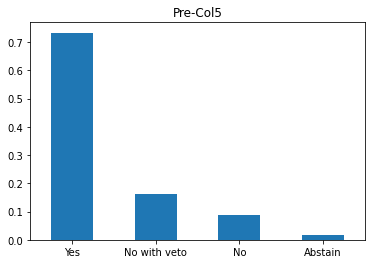

In [197]:
t='Pre-Col5'
m[m.typew==t].option.value_counts(normalize=True).plot(kind='bar', rot=0, title=t)

In [198]:
m[m.typew=='Post-DePeg'].option.value_counts(normalize=True)

Yes             0.735220
No with veto    0.206415
No              0.054843
Abstain         0.003522
Name: option, dtype: float64

In [199]:
m[m.typew=='Post-Col5'].option.value_counts(normalize=True)

Yes             0.627390
No with veto    0.235182
No              0.128107
Abstain         0.009321
Name: option, dtype: float64

In [200]:
m[m.typew=='Pre-Col5'].option.value_counts(normalize=True)

Yes             0.733224
No with veto    0.162207
No              0.088102
Abstain         0.016468
Name: option, dtype: float64